# Magic and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

%matplotlib inline

In [2]:
# running this messes up with auto-arima graphs

# !pip install pycaret-ts-alpha

In [3]:
!pip install arch yfinance pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima

In [5]:
# importing data

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

# Exploratory Data Analysis

## DataFrame formatting

In [7]:
# replacing index

data = data.set_index('Merchant Name')

In [8]:
# replacing columns names with standard date format

dates = pd.date_range(start='2020-08', end='2022-10', freq="M")
data.columns = dates

In [9]:
data.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,175.0,159.0,180.0,162.0,183.0,172.0,198.0,183.0,226.0,185.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,132.0,147.0,129.0,127.0,131.0,159.0,150.0,160.0,154.0,168.0


In [10]:
data.shape

(1913, 26)

## Total sum by month

In [11]:
# adding total

data.loc['total'] = data.sum()
data.tail()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
Merchant 1911,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Merchant 1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Merchant 1913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
total,5983120.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,...,8402646.0,7843850.0,7574393.0,7370176.0,7186898.0,8664142.0,7156954.0,7421947.0,7867331.0,7710690.0


In [12]:
data.shape

(1914, 26)

In [13]:
data.loc['total'][0]

5983120.0

In [14]:
df = pd.DataFrame(data.loc['total'].T)
df.index.name = 'Month'
df.head()

,total
Month,
2020-08-31,5983120.0
2020-09-30,5566534.0
2020-10-31,5730157.0
2020-11-30,6141497.0
2020-12-31,7070023.0


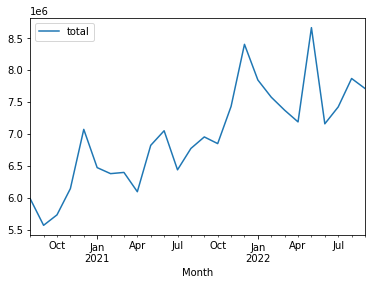

In [15]:
df.plot()

# Random forest time series

In [16]:
import pandas as pd
from sklearn.feature_selection import RFE

In [17]:
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import numpy as np
from datetime import timedelta
import calendar
data=df
data.head()

,total
Month,
2020-08-31,5983120.0
2020-09-30,5566534.0
2020-10-31,5730157.0
2020-11-30,6141497.0
2020-12-31,7070023.0


In [18]:
# ANSAM resetting index (Month becomes a column)

data = data.reset_index()

In [19]:
# ANSAM renaming 'Month' to 'date

data = data.rename(columns={'Month':'date'})

In [20]:
data.head(1)

,date,total
0,2020-08-31,5983120.0


In [21]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.total.dropna())
print('p-value: %f' % result[1])

p-value: 0.212913


In [22]:
dataframe = pd.DataFrame()

In [23]:
for i in range(12, 0, -1):
   dataframe['t-' + str(i)] = data.total.shift(i)

In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t-12    14 non-null     float64
 1   t-11    15 non-null     float64
 2   t-10    16 non-null     float64
 3   t-9     17 non-null     float64
 4   t-8     18 non-null     float64
 5   t-7     19 non-null     float64
 6   t-6     20 non-null     float64
 7   t-5     21 non-null     float64
 8   t-4     22 non-null     float64
 9   t-3     23 non-null     float64
 10  t-2     24 non-null     float64
 11  t-1     25 non-null     float64
dtypes: float64(12)
memory usage: 2.6 KB


In [25]:
final_data = pd.concat((data, dataframe), axis=1)

In [26]:
final_data.head()

,date,total,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
0,2020-08-31,5983120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-09-30,5566534.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5983120.0
2,2020-10-31,5730157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5983120.0,5566534.0
3,2020-11-30,6141497.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5983120.0,5566534.0,5730157.0
4,2020-12-31,7070023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5983120.0,5566534.0,5730157.0,6141497.0


In [27]:
final_data.dropna(inplace=True)

In [28]:
final_data.head()

,date,total,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,2021-08-31,6771052.0,5983120.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0
13,2021-09-30,6951601.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0
14,2021-10-31,6847040.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0
15,2021-11-30,7429920.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,6847040.0
16,2021-12-31,8402646.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,6847040.0,7429920.0


In [29]:
# ANSAM index is now int64 format

final_data.index

Int64Index([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype='int64')

In [30]:
# converting to object

pd.to_datetime(final_data.index).strftime('%Y-%m-%d')

Index(['1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
       '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01',
       '1970-01-01', '1970-01-01', '1970-01-01', '1970-01-01'],
      dtype='object')

In [31]:
# adding seasonal variable

final_data['date'] = pd.to_datetime(final_data['date'], format='%Y-%m-%d')
final_data['month'] = final_data['date'].dt.month

In [32]:
# or we can add dummy variables for each month

dummy = pd.get_dummies(final_data['month'])
final_data = pd.concat([final_data, dummy], axis=1)

In [33]:
# training the model

finaldf = final_data.drop(['date'], axis=1)
finaldf = finaldf.reset_index(drop=True)
test_length=6
end_point = len(finaldf)
x = end_point - test_length
# printing x and end_point
print(x, end_point)
finaldf_train = finaldf.loc[:x - 1, :]
finaldf_test = finaldf.loc[x:, :]
finaldf_test_x = finaldf_test.loc[:, finaldf_test.columns != 'total']
finaldf_test_y = finaldf_test['total']
finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'total']
finaldf_train_y = finaldf_train['total']
print("Starting model train..")
rfe = RFE(estimator=RandomForestRegressor(n_estimators=100, random_state=1), step=4)
fit = rfe.fit(finaldf_train_x, finaldf_train_y)
y_pred = fit.predict(finaldf_test_x)

8 14
Starting model train..


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [34]:
# evaluating the algorithm

y_true = np.array(finaldf_test_y)
sumvalue=np.sum(y_true)
mape=np.sum(np.abs((y_true - y_pred)))/sumvalue*100
accuracy=100-mape
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 94.49 %.


In [35]:
final_data

,date,total,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,...,3,4,5,6,7,8,9,10,11,12
12,2021-08-31,6771052.0,5983120.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,...,0,0,0,0,0,1,0,0,0,0
13,2021-09-30,6951601.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,...,0,0,0,0,0,0,1,0,0,0
14,2021-10-31,6847040.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,...,0,0,0,0,0,0,0,1,0,0
15,2021-11-30,7429920.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,...,0,0,0,0,0,0,0,0,1,0
16,2021-12-31,8402646.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,...,0,0,0,0,0,0,0,0,0,1
17,2022-01-31,7843850.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,...,0,0,0,0,0,0,0,0,0,0
18,2022-02-28,7574393.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,...,0,0,0,0,0,0,0,0,0,0
19,2022-03-31,7370176.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,6847040.0,...,1,0,0,0,0,0,0,0,0,0
20,2022-04-30,7186898.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,6847040.0,7429920.0,...,0,1,0,0,0,0,0,0,0,0
21,2022-05-31,8664142.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,6847040.0,7429920.0,8402646.0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
final_data.shape

(14, 27)

In [37]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 12 to 25
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    14 non-null     datetime64[ns]
 1   total   14 non-null     float64       
 2   t-12    14 non-null     float64       
 3   t-11    14 non-null     float64       
 4   t-10    14 non-null     float64       
 5   t-9     14 non-null     float64       
 6   t-8     14 non-null     float64       
 7   t-7     14 non-null     float64       
 8   t-6     14 non-null     float64       
 9   t-5     14 non-null     float64       
 10  t-4     14 non-null     float64       
 11  t-3     14 non-null     float64       
 12  t-2     14 non-null     float64       
 13  t-1     14 non-null     float64       
 14  month   14 non-null     int64         
 15  1       14 non-null     uint8         
 16  2       14 non-null     uint8         
 17  3       14 non-null     uint8         
 18  4       14 

In [38]:
final_data.reset_index()

,index,date,total,t-12,t-11,t-10,t-9,t-8,t-7,t-6,...,3,4,5,6,7,8,9,10,11,12
0,12,2021-08-31,6771052.0,5983120.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,...,0,0,0,0,0,1,0,0,0,0
1,13,2021-09-30,6951601.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,...,0,0,0,0,0,0,1,0,0,0
2,14,2021-10-31,6847040.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,...,0,0,0,0,0,0,0,1,0,0
3,15,2021-11-30,7429920.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,...,0,0,0,0,0,0,0,0,1,0
4,16,2021-12-31,8402646.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,...,0,0,0,0,0,0,0,0,0,1
5,17,2022-01-31,7843850.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,...,0,0,0,0,0,0,0,0,0,0
6,18,2022-02-28,7574393.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,...,0,0,0,0,0,0,0,0,0,0
7,19,2022-03-31,7370176.0,6395341.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,...,1,0,0,0,0,0,0,0,0,0
8,20,2022-04-30,7186898.0,6092995.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,6847040.0,...,0,1,0,0,0,0,0,0,0,0
9,21,2022-05-31,8664142.0,6819962.0,7048436.0,6436148.0,6771052.0,6951601.0,6847040.0,7429920.0,...,0,0,1,0,0,0,0,0,0,0


In [39]:
test = final_data.reset_index()

In [40]:
test.head()

,index,date,total,t-12,t-11,t-10,t-9,t-8,t-7,t-6,...,3,4,5,6,7,8,9,10,11,12
0,12,2021-08-31,6771052.0,5983120.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,...,0,0,0,0,0,1,0,0,0,0
1,13,2021-09-30,6951601.0,5566534.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,...,0,0,0,0,0,0,1,0,0,0
2,14,2021-10-31,6847040.0,5730157.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,...,0,0,0,0,0,0,0,1,0,0
3,15,2021-11-30,7429920.0,6141497.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,...,0,0,0,0,0,0,0,0,1,0
4,16,2021-12-31,8402646.0,7070023.0,6470676.0,6376336.0,6395341.0,6092995.0,6819962.0,7048436.0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
# test.drop(columns=['Month'])

In [42]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 12 to 25
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    14 non-null     datetime64[ns]
 1   total   14 non-null     float64       
 2   t-12    14 non-null     float64       
 3   t-11    14 non-null     float64       
 4   t-10    14 non-null     float64       
 5   t-9     14 non-null     float64       
 6   t-8     14 non-null     float64       
 7   t-7     14 non-null     float64       
 8   t-6     14 non-null     float64       
 9   t-5     14 non-null     float64       
 10  t-4     14 non-null     float64       
 11  t-3     14 non-null     float64       
 12  t-2     14 non-null     float64       
 13  t-1     14 non-null     float64       
 14  month   14 non-null     int64         
 15  1       14 non-null     uint8         
 16  2       14 non-null     uint8         
 17  3       14 non-null     uint8         
 18  4       14 

In [43]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from pandas import DataFrame
import numpy as np
from datetime import datetime
import calendar
from datetime import timedelta
import datetime as dt
def add_month(df, forecast_length, forecast_period):
    end_point = len(df)
    df1 = pd.DataFrame(index=range(forecast_length), columns=range(2))
    df1.columns = ['total', 'date']
    df = df.append(df1)
    df = df.reset_index(drop=True)
    x = df.at[end_point - 1, 'date']
    x = pd.to_datetime(x, format='%Y-%m-%d')
    days_in_month=calendar.monthrange(x.year, x.month)[1]
    if forecast_period == 'Week':
        for i in range(forecast_length):
            df.at[df.index[end_point + i], 'date'] = x + timedelta(days=7 + 7 * i)
            df.at[df.index[end_point + i], 'total'] = 0
    elif forecast_period == 'Month':
        for i in range(forecast_length):
            df.at[df.index[end_point + i], 'date'] = x + timedelta(days=days_in_month + days_in_month * i)
            df.at[df.index[end_point + i], 'total'] = 0
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df['month'] = df['date'].dt.month
    df = df.drop(['date'], axis=1)
    return df
def create_lag(df3):
    dataframe = DataFrame()
    for i in range(12, 0, -1):
        dataframe['t-' + str(i)] = df3.total.shift(i)
    df4 = pd.concat([df3, dataframe], axis=1)
    df4.dropna(inplace=True)
    return df4
def randomForest(df1, forecast_length, forecast_period):
    df3 = df1[['total', 'date']]
    df3 = add_month(df3, forecast_length, forecast_period)
    finaldf = create_lag(df3)
    finaldf = finaldf.reset_index(drop=True)
    n = forecast_length
    end_point = len(finaldf)
    x = end_point - n
    finaldf_train = finaldf.loc[:x - 1, :]
    finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'total']
    finaldf_train_y = finaldf_train['total']
    print("Starting model train..")
    rfe = RFE(RandomForestRegressor(n_estimators=100, random_state=1), step=4)
    fit = rfe.fit(finaldf_train_x, finaldf_train_y)
    print("Model train completed..")
    print("Creating forecasted set..")
    yhat = []
    end_point = len(finaldf)
    n = forecast_length
    df3_end = len(df3)
    for i in range(n, 0, -1):
        y = end_point - i
        inputfile = finaldf.loc[y:end_point, :]
        inputfile_x = inputfile.loc[:, inputfile.columns != 'total']
        pred_set = inputfile_x.head(1)
        pred = fit.predict(pred_set)
        df3.at[df3.index[df3_end - i], 'total'] = pred[0]
        finaldf = create_lag(df3)
        finaldf = finaldf.reset_index(drop=True)
        yhat.append(pred)
    yhat = np.array(yhat)
    print("Forecast complete..")
    return yhat
predicted_value=randomForest(data, 6, 'Month')

Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..


In [44]:
predicted_value

array([[7939368.2 ],
       [7836421.62],
       [7865860.08],
       [7820298.04],
       [7738660.09],
       [7843376.42]])

In [45]:
predicted_value2 =randomForest(data, 12, 'Month')
predicted_value2

Starting model train..
Model train completed..
Creating forecasted set..
Forecast complete..


array([[7939368.2 ],
       [7836421.62],
       [7865860.08],
       [7820298.04],
       [7738660.09],
       [7843376.42],
       [7777639.16],
       [7818671.44],
       [7808371.16],
       [7798836.64],
       [7808371.16],
       [7798836.64]])